In [ ]:
## Imports

# Basics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Language Processing

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Sklearn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

df_books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/goodreads-comments/data/all_books.csv')

df_comments = pd.read_json('/content/drive/MyDrive/Colab Notebooks/goodreads-comments/data/all_reviews.json')

Mounted at /content/drive


In [ ]:
df_books['lists']

0     {'Books': 359, 'Best': 135, '100': 153, '1001'...
1     {'Best': 118, 'Books': 20, 'Favorite': 183, 'T...
2     {'Books': 175, 'Best': 225, '100': 1557, 'Favo...
3     {'Best': 48, 'Books': 883, '100': 117, 'The': ...
4     {'Books': 38, 'Best': 118, '100': 83, '1001': ...
5     {'Books': 110, 'Best': 139, '100': 83, '1001':...
6     {'Best': 61, 'Science': 3, 'Favorite': 4441, '...
7     {'Books': 47, 'The': 2, 'Big': 7408, 'Best': 5...
8     {'Best': 5, 'The': 10, 'Books': 2781, '1001': ...
9     {'Best': 49, 'Books': 21, 'What': 165, '100': ...
10    {'Books': 29, 'Best': 10, '100': 6, 'The': 179...
11    {'Best': 429, 'Books': 4088, 'All': 281, '100'...
12    {'Best': 2, 'Books': 58, "Oprah's": 11, 'Most'...
13    {'Books': 1140, 'Best': 3, '100': 10057, 'Must...
Name: lists, dtype: object

In [ ]:
df_comments.head()

,book_id_title,book_id,book_title,review_url,review_id,date,rating,user_name,user_url,text,num_likes,sort_order,shelves
0,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/4840111965,4840111965,2022-07-11,5,chai ♡,/user/show/42130592-chai,I am just on fire with so much admiration for ...,1104,default,"[read-in-2022, adult, classic-lit, fiction, ha..."
1,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/147031934,147031934,2011-02-09,5,Emily May,/user/show/4622890-emily-may,This is my favourite book. I do not say that l...,3035,default,"[classics, clothbound-own]"
2,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/135628562,135628562,2010-12-18,5,K.,/user/show/2327078-k,I understand why many people hate this book. C...,2737,default,[]
3,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/26127128,26127128,2008-07-02,1,Ellen,/user/show/85101-ellen,I never expected this book to be as flagrantly...,1217,default,[]
4,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/43140984,43140984,2009-01-15,3,Eliszard,/user/show/655572-eliszard,Ah the classics. Everybody can read their own ...,633,default,[]


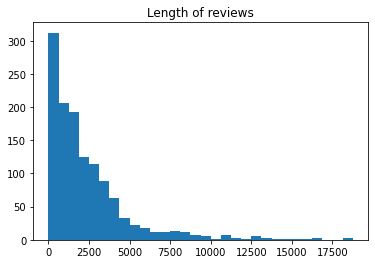

In [ ]:
lengths = [len(text) for text in df_comments['text']]
plt.hist(lengths, bins = 30)
plt.title('Length of reviews')
plt.show();

In [ ]:
comments_per_book = df_comments.groupby('book_title').count()['text']
comments_per_book

book_title
Little Women                                    60
Mrs. Dalloway                                   60
Narrative of the Life of Frederick Douglass     60
One Hundred Years of Solitude                   60
Pride and Prejudice                             90
The Bluest Eye                                  90
The Catcher in the Rye                         120
The Great Gatsby                               150
The Handmaid's Tale                            180
The Iliad                                       60
The Left Hand of Darkness                       60
The Scarlet Letter                              60
To Kill a Mockingbird                          120
Wuthering Heights                               90
Name: text, dtype: int64

In [ ]:
df_comments['text_length'] = df_comments['text'].apply(lambda x: len(x))
df_comments.groupby('book_title').sum()

,book_id,review_id,num_likes,text_length
book_title,,,,
Little Women,116040,122151216278,13627,84233
Mrs. Dalloway,896520,96016493513,9189,197404
Narrative of the Life of Frederick Douglass,2191740,119713814587,1965,94250
One Hundred Years of Solitude,19200,89569467772,19220,186561
Pride and Prejudice,169650,154912740262,32121,166661
The Bluest Eye,1020330,200771114679,7009,191739
The Catcher in the Rye,612840,163180786813,30098,280483
The Great Gatsby,700650,247923142481,21757,278645
The Handmaid's Tale,6920460,281749370330,32703,389836


In [ ]:
df_comments

,book_id_title,book_id,book_title,review_url,review_id,date,rating,user_name,user_url,text,num_likes,sort_order,shelves,text_length
0,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/4840111965,4840111965,2022-07-11,5,chai ♡,/user/show/42130592-chai,I am just on fire with so much admiration for ...,1104,default,"[read-in-2022, adult, classic-lit, fiction, ha...",8165
1,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/147031934,147031934,2011-02-09,5,Emily May,/user/show/4622890-emily-may,This is my favourite book. I do not say that l...,3035,default,"[classics, clothbound-own]",3142
2,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/135628562,135628562,2010-12-18,5,K.,/user/show/2327078-k,I understand why many people hate this book. C...,2737,default,[],2768
3,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/26127128,26127128,2008-07-02,1,Ellen,/user/show/85101-ellen,I never expected this book to be as flagrantly...,1217,default,[],1991
4,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/43140984,43140984,2009-01-15,3,Eliszard,/user/show/655572-eliszard,Ah the classics. Everybody can read their own ...,633,default,[],1515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,11337.The_Bluest_Eye,11337,The Bluest Eye,https://www.goodreads.com/review/show/3842420607,3842420607,2021-02-28,4,Suzy,/user/show/6942006-suzy,This book ripped my heart out! As GR friend Fr...,16,default,"[audio-faves, back-and-forth-in-time, child-or...",851
1256,11337.The_Bluest_Eye,11337,The Bluest Eye,https://www.goodreads.com/review/show/1731475749,1731475749,2019-12-27,5,Sidharth Vardhan,/user/show/58296635-sidharth-vardhan,"I wasn't a big fan of 'Girl, Woman, Other' but...",16,default,"[woman-authors, 8-usa, nobel, banned-challenge...",4253
1257,11337.The_Bluest_Eye,11337,The Bluest Eye,https://www.goodreads.com/review/show/4894741808,4894741808,2022-08-04,5,Thaís,/user/show/7332875-tha-s,um caminhão chamado Toni Morrison me atropelou...,16,default,[],76
1258,11337.The_Bluest_Eye,11337,The Bluest Eye,https://www.goodreads.com/review/show/1536853498,1536853498,2016-02-03,4,Dhanaraj Rajan,/user/show/4373783-dhanaraj-rajan,An imagined interview with Toni Morrison:Me: W...,17,default,"[afro-american-lit, american-lit, contemporary...",2620


In [ ]:
df_comments['text'][0]

'I am just on fire with so much admiration for Emily Brontë right now. Wuthering Heights is a beautiful, devastating, and profoundly haunting experience that reminded me of what literature is for. I felt this story like an itching beneath the skin and thought about it so often in the past few days there was hardly any space left in my mind for anything else. Which is to say, I am so mad I didn’t read it sooner. **Since its first publication in 1847, Wuthering Heights generated a lot of controversy. Early reviews dismissed it as an aberration, with one pearl-clutching reviewer wondering “how a human being could have attempted such a book as the present without committing suicide before he had finished a dozen chapters.” Others, like Sylvia Plath and E.M. Forster, were drawn to the complex, often contradictory open vein of the novel and rejected such easy classifications. Today, Wuthering Heights continues to be one of the most dynamic and generative novels of the 19th century, enabling 

In [ ]:
def cleaning(sentence):
    
    # Basic cleaning
    sentence = sentence.strip() ## remove whitespaces
    sentence = sentence.lower() ## lowercase 
    sentence = ''.join(char for char in sentence if not char.isdigit()) ## remove numbers
    
    # Advanced cleaning
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') ## remove punctuation
    
    tokenized_sentence = word_tokenize(sentence) ## tokenize 
    stop_words = set(stopwords.words('english')) ## define stopwords
    
    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in stop_words
    ]

    lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "v") 
        for word in tokenized_sentence_cleaned
    ]
    
    cleaned_sentence = ' '.join(word for word in lemmatized)
    
    return cleaned_sentence

In [ ]:
df_comments['clean_text'] = df_comments['text'].apply(cleaning)
df_comments.head()

,book_id_title,book_id,book_title,review_url,review_id,date,rating,user_name,user_url,text,num_likes,sort_order,shelves,text_length,clean_text
0,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/4840111965,4840111965,2022-07-11,5,chai ♡,/user/show/42130592-chai,I am just on fire with so much admiration for ...,1104,default,"[read-in-2022, adult, classic-lit, fiction, ha...",8165,fire much admiration emily brontë right wuther...
1,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/147031934,147031934,2011-02-09,5,Emily May,/user/show/4622890-emily-may,This is my favourite book. I do not say that l...,3035,default,"[classics, clothbound-own]",3142,favourite book say lightly ive read quite lot ...
2,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/135628562,135628562,2010-12-18,5,K.,/user/show/2327078-k,I understand why many people hate this book. C...,2737,default,[],2768,understand many people hate book catherine hea...
3,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/26127128,26127128,2008-07-02,1,Ellen,/user/show/85101-ellen,I never expected this book to be as flagrantly...,1217,default,[],1991,never expect book flagrantly unforgivably bad ...
4,6185.Wuthering_Heights,6185,Wuthering Heights,https://www.goodreads.com/review/show/43140984,43140984,2009-01-15,3,Eliszard,/user/show/655572-eliszard,Ah the classics. Everybody can read their own ...,633,default,[],1515,ah classics everybody read agenda first short ...


In [ ]:
df_comments.groupby('book_id').sum()

,review_id,num_likes,text_length
book_id,,,
320,89569467772,19220,186561
1371,128805186660,6564,194072
1885,154912740262,32121,166661
1934,122151216278,13627,84233
2657,178779350165,19778,262968
4671,247923142481,21757,278645
5107,163180786813,30098,280483
6185,153556699703,22423,223144
11337,200771114679,7009,191739


In [ ]:
clean_text = df_comments['clean_text']

In [ ]:
vectorizer = TfidfVectorizer(min_df = 20)
vectorized_text = vectorizer.fit_transform(clean_text)
vector_text = pd.DataFrame(vectorized_text.toarray(), 
                                    columns = vectorizer.get_feature_names_out())

vector_text

,ability,able,absolutely,absorb,abuse,accept,accord,account,accuse,achieve,...,نویسنده,ها,های,هذا,هم,همه,همین,کتاب,که,یک
0,0.0,0.0,0.0,0.0,0.059324,0.027714,0.0,0.059608,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.074621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.294827,0.091822,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1256,0.0,0.0,0.0,0.0,0.000000,0.049715,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1257,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1258,0.0,0.0,0.0,0.0,0.000000,0.061388,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Instantiate the LDA 
n_components = 10
lda_model = LatentDirichletAllocation(n_components=n_components, max_iter = 100)

# Fit the LDA on the vectorized documents
lda_model.fit(vector_text)

LatentDirichletAllocation(max_iter=100)

In [ ]:
topic_word_mixture = pd.DataFrame(lda_model.components_, 
                                 columns = vectorizer.get_feature_names_out())

In [ ]:
topic_word_mixture[topic_word_mixture > 0.02].sum().sort_values(ascending = False).head(20)

book         93.024040
read         77.747809
one          54.447840
like         48.666852
time         46.610714
love         45.281184
story        40.219459
think        39.893689
write        36.701799
character    36.222649
make         36.114804
novel        35.248738
get          35.116360
know         32.704041
people       32.564280
would        31.933030
gatsby       31.419095
say          30.242879
go           29.898452
much         29.881981
dtype: float64

In [ ]:
def print_topics(lda_model, vectorizer, top_words):
    # 1. TOPIC MIXTURE OF WORDS FOR EACH TOPIC
    topic_mixture = pd.DataFrame(lda_model.components_,
                                 columns = vectorizer.get_feature_names_out())
    
    # 2. FINDING THE TOP WORDS FOR EACH TOPIC
    ## Number of topics
    n_components = topic_mixture.shape[0]
    ## Top words for each topic
    for topic in range(n_components):
        print("-"*10)
        print(f"For topic {topic}, here are the the top {top_words} words with weights:")
        topic_df = topic_mixture.iloc[topic]\
                             .sort_values(ascending = False).head(top_words)
        
        print(round(topic_df,3))

In [ ]:
print_topics(lda_model, vectorizer, 20)

----------
For topic 0, here are the the top 20 words with weights:
nick        1.755
gatsby      1.460
deserve     1.223
better      0.931
current     0.650
thing       0.617
beat        0.607
carraway    0.581
daisy       0.581
bear        0.514
past        0.502
free        0.485
get         0.481
head        0.445
back        0.428
describe    0.424
man         0.351
live        0.336
pearl       0.100
ursula      0.100
Name: 0, dtype: float64
----------
For topic 1, here are the the top 20 words with weights:
finish           0.904
struggle         0.530
hard             0.475
read             0.269
pearl            0.100
ursula           0.100
unfortunately    0.100
stick            0.100
hearts           0.100
air              0.100
general          0.100
novels           0.100
men              0.100
oh               0.100
john             0.100
create           0.100
word             0.100
june             0.100
magical          0.100
media            0.100
Name: 1, dtype: floa

In [ ]:
df_comments.columns

Index(['book_id_title', 'book_id', 'book_title', 'review_url', 'review_id',
       'date', 'rating', 'user_name', 'user_url', 'text', 'num_likes',
       'sort_order', 'shelves', 'text_length', 'clean_text'],
      dtype='object')

In [ ]:
df_comments['book_title'].unique()

array(['Wuthering Heights', 'The Iliad', "The Handmaid's Tale",
       'The Left Hand of Darkness', 'The Catcher in the Rye',
       'To Kill a Mockingbird', 'Little Women',
       'One Hundred Years of Solitude', 'Mrs. Dalloway',
       'Pride and Prejudice', 'The Great Gatsby', 'The Scarlet Letter',
       'Narrative of the Life of Frederick Douglass', 'The Bluest Eye'],
      dtype=object)

In [ ]:
df_comments.groupby(['book_title', 'rating']).size().sort_values()

book_title                                   rating
One Hundred Years of Solitude                           1
The Catcher in the Rye                                  1
The Iliad                                    1          1
Narrative of the Life of Frederick Douglass  3          1
Wuthering Heights                                       2
                                                       ..
The Handmaid's Tale                          4         55
Pride and Prejudice                          5         58
The Great Gatsby                             5         77
The Handmaid's Tale                          5         85
To Kill a Mockingbird                        5         90
Length: 81, dtype: int64

In [ ]:
mockingbird_5 = df_comments[df_comments['rating'] == 5][df_comments['book_title'] == 'To Kill a Mockingbird']['clean_text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([38., 29., 13.,  4.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  1.]),
 array([    0.        ,   768.06666667,  1536.13333333,  2304.2       ,
         3072.26666667,  3840.33333333,  4608.4       ,  5376.46666667,
         6144.53333333,  6912.6       ,  7680.66666667,  8448.73333333,
         9216.8       ,  9984.86666667, 10752.93333333, 11521.        ]),
 <a list of 15 Patch objects>)

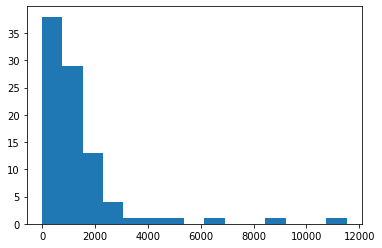

In [ ]:
lengths_m5 = [len(i) for i in mockingbird_5]
plt.hist(lengths_m5, bins = 15)

In [ ]:
vectorizer_m5 = TfidfVectorizer()
vectorized_m5 = vectorizer_m5.fit_transform(mockingbird_5)
vector_m5 = pd.DataFrame(vectorized_m5.toarray(), 
                                    columns = vectorizer_m5.get_feature_names_out())

vector_m5

,abandonar,aberrations,abide,ability,able,abound,about,aboutwhy,abovethe,abroad,...,گوینده,گیرند,گیرندکتاب,یا,یاد,یاغی,یه,یک,یکسال,یکی
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.027532,0.0,0.0,0.0,0.094283,0.027532,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.061159,0.023786,0.0,0.0,0.0,0.0,0.032712,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.000000,0.090244,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
86,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
87,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
88,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


In [ ]:
n_components = 10
lda_model = LatentDirichletAllocation(n_components=n_components, max_iter = 100)

# Fit the LDA on the vectorized documents
lda_model.fit(vector_m5)

LatentDirichletAllocation(max_iter=100)

In [ ]:
topic_word_mixture_m5 = pd.DataFrame(lda_model.components_, 
                                 columns = vectorizer_m5.get_feature_names_out())

In [ ]:
print_topics(lda_model, vectorizer_m5, 5)

----------
For topic 0, here are the the top 5 words with weights:
forever    0.543
mom        0.427
را         0.406
از         0.390
در         0.383
Name: 0, dtype: float64
----------
For topic 1, here are the the top 5 words with weights:
wouldif          0.788
unforgettable    0.552
crisis           0.373
bestseller       0.373
rock             0.373
Name: 1, dtype: float64
----------
For topic 2, here are the the top 5 words with weights:
که     0.631
de     0.583
la     0.541
این    0.488
في     0.480
Name: 2, dtype: float64
----------
For topic 3, here are the the top 5 words with weights:
de        0.652
και       0.644
assign    0.510
να        0.460
tiny      0.450
Name: 3, dtype: float64
----------
For topic 4, here are the the top 5 words with weights:
μας    0.529
de     0.515
که     0.514
que    0.442
از     0.411
Name: 4, dtype: float64
----------
For topic 5, here are the the top 5 words with weights:
jon              0.371
single           0.319
onset            0.317

In [ ]:
mockingbird_1 = df_comments[df_comments['rating'] == 1][df_comments['book_title'] == 'To Kill a Mockingbird']['clean_text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 305.        ,  622.73333333,  940.46666667, 1258.2       ,
        1575.93333333, 1893.66666667, 2211.4       , 2529.13333333,
        2846.86666667, 3164.6       , 3482.33333333, 3800.06666667,
        4117.8       , 4435.53333333, 4753.26666667, 5071.        ]),
 <a list of 15 Patch objects>)

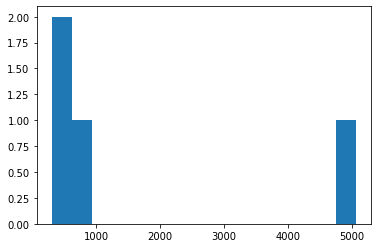

In [ ]:
lengths_m1 = [len(i) for i in mockingbird_1]
plt.hist(lengths_m1, bins = 15)

In [ ]:
vectorizer_m1 = TfidfVectorizer()
vectorized_m1 = vectorizer_m1.fit_transform(mockingbird_1)
vector_m1 = pd.DataFrame(vectorized_m1.toarray(), 
                                    columns = vectorizer_m1.get_feature_names_out())

vector_m1

,able,absolutely,absurd,accept,accomplishment,accuse,acquit,act,action,actually,...,women,wonder,wont,word,would,write,writer,years,yes,yet
0,0.03985,0.019925,0.019925,0.0797,0.019925,0.03985,0.019925,0.019925,0.03985,0.031418,...,0.019925,0.019925,0.019925,0.019925,0.031193,0.031418,0.00000,0.019925,0.019925,0.00000
1,0.00000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.00000,0.123119,...,0.000000,0.000000,0.000000,0.000000,0.081492,0.000000,0.00000,0.000000,0.000000,0.00000
2,0.00000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.058780,0.088806,0.00000,0.000000,0.000000,0.00000
3,0.00000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.089976,0.000000,0.08621,0.000000,0.000000,0.08621


In [ ]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   book_id_title  1260 non-null   object        
 1   book_id        1260 non-null   int64         
 2   book_title     1260 non-null   object        
 3   review_url     1260 non-null   object        
 4   review_id      1260 non-null   int64         
 5   date           1260 non-null   datetime64[ns]
 6   rating         1260 non-null   object        
 7   user_name      1260 non-null   object        
 8   user_url       1260 non-null   object        
 9   text           1260 non-null   object        
 10  num_likes      1260 non-null   int64         
 11  sort_order     1260 non-null   object        
 12  shelves        1260 non-null   object        
 13  text_length    1260 non-null   int64         
 14  clean_text     1260 non-null   object        
dtypes: datetime64[ns](1),

In [ ]:
df_comments['book_id_title'].unique()

array(['6185.Wuthering_Heights', '1371.The_Iliad',
       '38447.The_Handmaid_s_Tale', '18423.The_Left_Hand_of_Darkness',
       '5107.The_Catcher_in_the_Rye', '2657.To_Kill_a_Mockingbird',
       '1934.Little_Women', '320.One_Hundred_Years_of_Solitude',
       '14942.Mrs_Dalloway', '1885.Pride_and_Prejudice',
       '4671.The_Great_Gatsby', '12296.The_Scarlet_Letter',
       '36529.Narrative_of_the_Life_of_Frederick_Douglass',
       '11337.The_Bluest_Eye'], dtype=object)

(array([ 30.,   0.,  68.,   0.,  73.,   0., 127.,   0., 311., 651.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

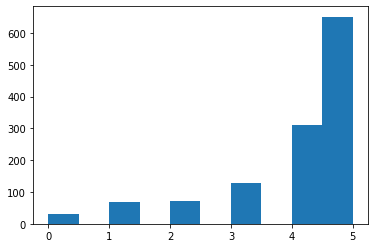

In [ ]:
plt.hist(df_comments['rating'].map({5:5, 4:4, 3:3, 2:2, 1:1, '':0}))

(array([651.,   0.,   0.,   0.,   0., 298.,   0.,   0.,   0., 311.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

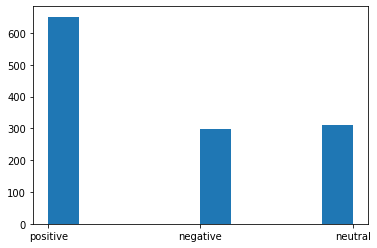

In [ ]:
df_comments['clean_ratings'] = df_comments['rating'].map(
    {5:'positive', 4:'neutral', 3:'negative', 2:'negative', 1:'negative', '':'negative'}
)

plt.hist(df_comments['clean_ratings'])

In [ ]:
np.array(df_comments['clean_text'])

array(['fire much admiration emily brontë right wuthering heights beautiful devastate profoundly haunt experience remind literature felt story like itch beneath skin think often past days hardly space leave mind anything else say mad ’ read sooner since first publication wuthering heights generate lot controversy early review dismiss aberration one pearlclutching reviewer wonder “ human could attempt book present without commit suicide finish dozen chapters ” others like sylvia plath em forster draw complex often contradictory open vein novel reject easy classifications today wuthering heights continue one dynamic generative novels th century enable many difficult contradictory stances good reason follow content contain spoilersthe first element make wuthering heights interest present series second even third hand account story rehearse sanitize multiple reenactors reader last succession interpreters put different way story change hand multiple time often uncomprehending hostile narrat

In [ ]:
book_id_titles = df_comments['book_id_title'].unique()
clean_ratings = ['positive', 'negative', 'neutral']
comments_dict = {}

for title in book_id_titles:
  for rating in clean_ratings:
    comments_dict[f'{title}_{rating}'] = np.array(df_comments[df_comments['book_id_title'] == title][df_comments['clean_ratings'] == rating]['clean_text'])


comments_dict.keys()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


dict_keys(['6185.Wuthering_Heights_positive', '6185.Wuthering_Heights_negative', '6185.Wuthering_Heights_neutral', '1371.The_Iliad_positive', '1371.The_Iliad_negative', '1371.The_Iliad_neutral', '38447.The_Handmaid_s_Tale_positive', '38447.The_Handmaid_s_Tale_negative', '38447.The_Handmaid_s_Tale_neutral', '18423.The_Left_Hand_of_Darkness_positive', '18423.The_Left_Hand_of_Darkness_negative', '18423.The_Left_Hand_of_Darkness_neutral', '5107.The_Catcher_in_the_Rye_positive', '5107.The_Catcher_in_the_Rye_negative', '5107.The_Catcher_in_the_Rye_neutral', '2657.To_Kill_a_Mockingbird_positive', '2657.To_Kill_a_Mockingbird_negative', '2657.To_Kill_a_Mockingbird_neutral', '1934.Little_Women_positive', '1934.Little_Women_negative', '1934.Little_Women_neutral', '320.One_Hundred_Years_of_Solitude_positive', '320.One_Hundred_Years_of_Solitude_negative', '320.One_Hundred_Years_of_Solitude_neutral', '14942.Mrs_Dalloway_positive', '14942.Mrs_Dalloway_negative', '14942.Mrs_Dalloway_neutral', '1885.Pr

In [ ]:
comments_dict['1371.The_Iliad_positive']

array(['pablo picasso spend entire life try desperately something new something unique move style style master abandon modern classical methods even try teach train artists hand paint like childin four french teens dog stumble upon cave lie hide years inside find wall cover beautiful draw men animals lascaux cave open public pablo picasso visit star prehistoric hunt scenes hear remark despondent tone invent nothingthe iliad equally humble writer complex beautiful honest work war scenes play like modern film gory fastpaced everpresent shock death though annoy man name even give past death give weight action death consequence man step onto stage meet glory death homer give us moment recognize see amidst whirl action witness fate zeus metesthe psychological complexity humanism work often shock homer depiction human be fundamentally flaw unable direct live predict existentialism even hand give trojans argives place work later moralize allegories turold tasso even miltonof course homer diff

In [ ]:
pd.DataFrame(comments_dict)

ValueError: ignored